In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate() #si existe una sesion existente la usa y sino la crea

In [4]:
path = "C:/Users/USER/Desktop/Curso Spark Udemy/Ejercicios prácticos/data/stocks_price_final.csv"
b_data = spark.read.csv(
    path,
    sep = ',',
    header = True, #primera fila con encabezado
    )

b_data.printSchema() #esquema de datos obtenidos

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [5]:
from pyspark.sql.types import *
#algunas veces el tipo de datos inferido por pyspark es incorrecto y debemos modificarlo manualmente
data_schema = [
               StructField('_c0', IntegerType(), True), # nombre_variable, tipo_dato, nullable- Si= True, No=False
               StructField('symbol', StringType(), True),  #norml. será False si los datos son de tipo #Id 
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [6]:
data = spark.read.csv(
    "C:/Users/USER/Desktop/Curso Spark Udemy/Ejercicios prácticos/data/stocks_price_final.csv",
    sep = ',',
    header = True,
    schema = final_struc #le pasamos el esquema que acabamos de crear
    )

In [7]:
data.show(4)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+---------+--------

## Ejercicio 1: 
Eliminar o renombrar la variable market.cap

In [8]:
# Para eliminar una variable
data = data.drop('market.cap')
#Para renombrar una 
# data.withColumnRenamed('market.cap','market_cap')

## Ejercicio 2: 
Filtrar los datos donde el valor de 'open' es nulo y eliminar esas filas.

In [9]:
data.filter("open is null").show() #filtro los datos donde el valor "open" es nulo.


+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
| _c0|symbol|      data|open|high| low|close|volume|adjusted|       sector|            industry|exchange|
+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
|4378|  KRKR|2020-05-11|null|null|null| null|  null|    null|Miscellaneous|   Business Services|  NASDAQ|
|5747|  NMTR|2020-01-23|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5748|  NMTR|2020-01-24|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5749|  NMTR|2020-01-27|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5750|  NMTR|2020-01-28|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5751|  NMTR|2020-01-29|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5752|  NMTR|2020-01-30|null|null|null| null| 

In [10]:
data.na.drop() #elimino los valores nulos

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, sector: string, industry: string, exchange: string]

## Ejercicio 3: 
Calcular el mínimo y máximo de data, open, close y adjusted.

In [12]:
from pyspark.sql.functions import col, min, max, avg, lit

data.groupBy("industry") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

+-------------------------------------------------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|industry                                                     |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+-------------------------------------------------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Finance/Investors Services                                   |2019-01-02|2020-07-22|0.782          |12.77          |5.13440178571429  |0.782          |12.69          |5.136630739795919 |0.782                   

## Ejercicio 4:
Convertir un DataFrame de Spark en un DataFrame de pandas.

In [13]:
data.toPandas()

,_c0,symbol,data,open,high,low,close,volume,adjusted,sector,industry,exchange
0,1,TXG,2019-09-12,54.000000,58.000000,51.000000,52.750000,7326300.0,52.750000,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
1,2,TXG,2019-09-13,52.750000,54.355000,49.150002,52.270000,1025200.0,52.270000,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
2,3,TXG,2019-09-16,52.450001,56.000000,52.009998,55.200001,269900.0,55.200001,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
3,4,TXG,2019-09-17,56.209999,60.900002,55.423000,56.779999,602800.0,56.779999,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
4,5,TXG,2019-09-18,56.849998,62.270000,55.650002,62.000000,1589600.0,62.000000,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
...,...,...,...,...,...,...,...,...,...,...,...,...
1729029,1729030,ZYME,2020-07-16,30.570000,31.670000,30.299999,31.150000,467900.0,31.150000,Health Care,Major Pharmaceuticals,NYSE
1729030,1729031,ZYME,2020-07-17,31.200001,33.080002,31.000000,33.029999,600800.0,33.029999,Health Care,Major Pharmaceuticals,NYSE
1729031,1729032,ZYME,2020-07-20,33.320000,33.320000,31.589001,32.110001,303500.0,32.110001,Health Care,Major Pharmaceuticals,NYSE
1729032,1729033,ZYME,2020-07-21,32.369999,32.490002,30.340000,30.650000,337900.0,30.650000,Health Care,Major Pharmaceuticals,NYSE


## Ejercicio 5: 
Calcular la media de las variables open, close y adjusted por industria.

In [26]:
ind_df =  data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
ind_df.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819


## Ejercicio 6:
Generar un gráfico de líneas donde se muestre la media de open por industria.

<AxesSubplot: >

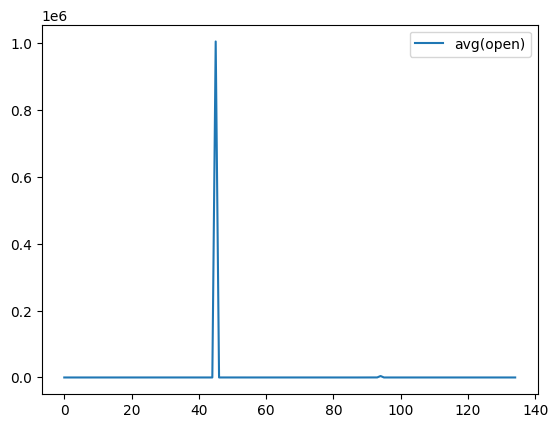

In [27]:
ind_df[['industry', 'avg(open)']].plot()

## Ejercicio 7:
Generar un heatmap con seaborn donde se muestre la correlación entre las medias de open, close y adjusted.

C:\Users\USER\AppData\Local\Temp\ipykernel_1680\2084646683.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ind_df.corr()


<AxesSubplot: >

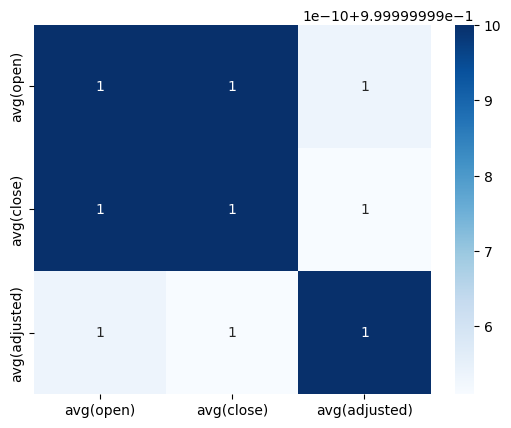

In [31]:
corr = ind_df.corr() #matriz de correlación
sns.heatmap(corr, cmap="Blues", annot=True) #la dibujo en un mapa de calor

## Ejercicio 8:
Guardar en un archivo parquet una selección de datos

In [34]:
data.select(["industry","open","close"])\
.write.save('dataset.parquet', format='parquet')